<a href="https://colab.research.google.com/github/DMaraboli/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
import matplotlib.pyplot as plt

def ingresos_totales(tienda):
    suma = tienda.groupby('Tienda')[['Precio', 'Costo de envío']].sum()
    suma['Ingreso total'] = suma['Precio'] - suma['Costo de envío']
    ingresos = suma['Ingreso total'].to_dict()
    return ingresos

def conteos(tienda, columna):
    return tienda[columna].value_counts().to_dict()

def mayor (conteos):
    valor_max = max(conteos.values())
    mayor = [k for k, v in conteos.items() if v == valor_max]
    return mayor

def menor (conteos):
    valor_min = min(conteos.values())
    menor = [k for k, v in conteos.items() if v == valor_min]
    return menor
##Junta las listas en una
tiendas_unidas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
##Transforma en formato fecha
tiendas_unidas['Fecha de Compra'] = pd.to_datetime(tiendas_unidas['Fecha de Compra'], format='%d/%m/%Y')

In [7]:
##Agrego columna tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

'''
mayor_p = mayor(conteo_producto)
menor_p = menor(conteo_producto)
print(mayor_p)
print(menor_p)
'''

###print(conteo_producto)




print(ingresos_totales (tiendas_unidas))


{'Tienda 1': 1089502500.0, 'Tienda 2': 1056858400.0, 'Tienda 3': 1039503000.0, 'Tienda 4': 983058300.0}


# 2. Ventas por categoría

In [8]:
conteo_producto_t1 = conteos(tienda,'Categoría del Producto')
conteo_producto_t2 = conteos(tienda2,'Categoría del Producto')
conteo_producto_t3 = conteos(tienda3,'Categoría del Producto')
conteo_producto_t4 = conteos(tienda4,'Categoría del Producto')
print(conteo_producto_t1)
print(conteo_producto_t2)
print(conteo_producto_t3)
print(conteo_producto_t4)

{'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
{'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
{'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
{'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}


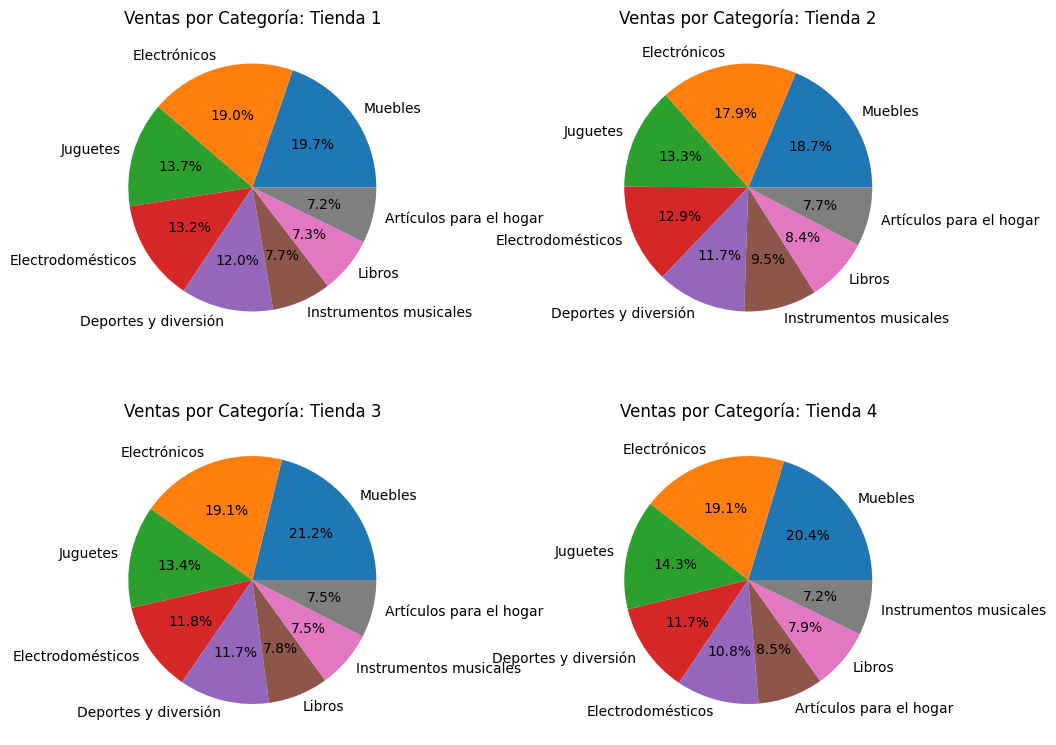

In [11]:
conteos = [conteo_producto_t1, conteo_producto_t2, conteo_producto_t3, conteo_producto_t4]
titulos = ['Ventas por Categoría: Tienda 1', 'Ventas por Categoría: Tienda 2', 'Ventas por Categoría: Tienda 3', 'Ventas por Categoría: Tienda 4']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flat):
    datos = conteos[i]
    ax.pie(datos.values(), labels=datos.keys(), autopct='%1.1f%%')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda